## Step 1 — Data Import & Initial Preview :-

In this step, both datasets are loaded and the top few rows are displayed
to understand the structure, columns, and data types before analysis.

“Previewing the dataset helps verify structure, column names, and data types before cleaning.”

In [2]:
import pandas as pd
import numpy as np
print("Notebook ready")

Notebook ready


In [3]:
fear = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

fear.head(), trades.head()

(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

In [4]:
fear.info()
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-nu

In [34]:
print("Trades before merge:", trades.shape[0])
print("Trades after merge:", merged.shape[0])

Trades before merge: 211224
Trades after merge: 211224


In [36]:
print("Fear dataset shape :", fear.shape)
print("Trades dataset shape:", trades.shape)

Fear dataset shape : (2644, 5)
Trades dataset shape: (211224, 17)


## Step 2 — Data Cleaning & Pre-Processing :

In this step, timestamp columns are converted into proper datetime format,
missing / invalid rows are removed, and a new feature *pnl_flag* is created
to classify trades into Profit or Loss. 

These transformations help in making the data analysis-ready
and enable further behavioural insights on trading performance.

In [6]:
fear['date'] = pd.to_datetime(fear['date'])
trades['Timestamp'] = pd.to_datetime(trades['Timestamp'])

fear.dropna(inplace=True)
trades.dropna(inplace=True)

In [7]:
fear.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [8]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50


In [9]:
fear.isnull().sum(),
trades.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [10]:
trades = trades[trades['Closed PnL'].notna()]
print("After cleaning:", trades.shape)
trades.head()

After cleaning: (211224, 16)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50


### Observation :-
At this stage, the trades dataset is cleaned and enriched with a new
feature (pnl_flag). The dataset is now ready for trend-level analysis
and behavioural interpretation.

##  Step 3 — Aligning Trades with Market Sentiment (Data Merging) :-

In this step, the Trades dataset is merged with the Fear–Greed Index dataset.

→ A new column date_only is created in both datasets so that data can be matched
   based on trading date instead of full timestamp.

→ Using this common date column, both datasets are combined using a Left Join,
   which ensures every trade is mapped with the corresponding market sentiment.

This merging step helps in analysing how trader behaviour and profitability
changes under different market sentiment conditions such as Fear, Greed, or Neutral.

In [11]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'],errors='coerce' ,utc=False)

In [12]:
from IPython.display import display

In [13]:
trades['date_only'] = trades['Timestamp IST'].dt.date
fear['date_only'] = pd.to_datetime(fear['date']).dt.date

In [14]:
merged = pd.merge(
    trades,
    fear[['date_only','classification']],
    on='date_only',
    how='left'
)

In [15]:
merged['pnl_flag'] = np.where(
    merged['Closed PnL'] >= 0,
    'Profit',
    'Loss'
)

In [16]:
print("Rows:", merged.shape)
display(merged[['date_only','classification','pnl_flag']].head(10))

Rows: (211224, 19)


,date_only,classification,pnl_flag
0,2024-02-12,Greed,Profit
1,2024-02-12,Greed,Profit
2,2024-02-12,Greed,Profit
3,2024-02-12,Greed,Profit
4,2024-02-12,Greed,Profit
5,2024-02-12,Greed,Profit
6,2024-02-12,Greed,Profit
7,2024-02-12,Greed,Profit
8,2024-02-12,Greed,Profit
9,2024-02-12,Greed,Profit


##  Step 4.1 — Profit vs Loss Classification :-

In this step, we create a new feature pnl_flag to categorize trades 
based on their Closed PnL value.  

→ If Closed PnL ≥ 0 → Trade is marked as *Profit*  
→ If Closed PnL < 0 → Trade is marked as *Loss*  

We then group the results by market sentiment and trade outcome to 
understand trader performance across different sentiment phases.

In [17]:
merged['pnl_flag'] = np.where(merged['Closed PnL'] >= 0, 'Profit', 'Loss')
merged[['classification','pnl_flag']].head()

,classification,pnl_flag
0,Greed,Profit
1,Greed,Profit
2,Greed,Profit
3,Greed,Profit
4,Greed,Profit


##  Step 4.2 Group Analysis :-

### Insight — 

From the grouped results, we observe that profit trades are significantly higher in count
compared to loss trades across different market sentiment phases. This indicates that the
trading strategy generally performs well and is able to capture favorable opportunities
even during volatile market periods.

However, loss trades are still present in all sentiment categories, which shows that market
risk cannot be completely eliminated. Traders should therefore maintain risk management
practices instead of relying solely on sentiment-based decisions.



In [18]:
result1 = merged.groupby(['classification','pnl_flag']).size().reset_index(name='count')
result1

,classification,pnl_flag,count
0,Extreme Fear,Loss,142
1,Extreme Fear,Profit,2184
2,Extreme Greed,Loss,306
3,Extreme Greed,Profit,5315
4,Fear,Loss,920
5,Fear,Profit,12949
6,Greed,Loss,884
7,Greed,Profit,10408
8,Neutral,Loss,307
9,Neutral,Profit,2449


In [19]:
merged['classification'].isna().sum(),merged.shape[0]

(np.int64(175360), 211224)

In [20]:
merged_clean = merged.dropna(subset=['classification'])
merged_clean.shape

(35864, 19)

## Step 5.1 :-Convert timestamps to real datetime

### Insight — 

Converting the timestamp column into a proper datetime format helped in aligning trades
with their corresponding market dates. This step was important for merging the trade
dataset with the Fear-Greed sentiment dataset and for performing time-based behavioral
analysis.

By extracting only the date component, we were able to analyze trades on a day-level trend
instead of individual transaction timestamps.

In [21]:

# Convert to datetime safely
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce')
fear['date'] = pd.to_datetime(fear['date'], errors='coerce')

# Extract only DATE part
trades['date_only'] = trades['Timestamp IST'].dt.date
fear['date_only'] = fear['date'].dt.date

# Preview
print(trades[['Timestamp IST','date_only']].head())
print(fear[['date','date_only']].head())


        Timestamp IST   date_only
0 2024-02-12 22:50:00  2024-02-12
1 2024-02-12 22:50:00  2024-02-12
2 2024-02-12 22:50:00  2024-02-12
3 2024-02-12 22:50:00  2024-02-12
4 2024-02-12 22:50:00  2024-02-12
        date   date_only
0 2018-02-01  2018-02-01
1 2018-02-02  2018-02-02
2 2018-02-03  2018-02-03
3 2018-02-04  2018-02-04
4 2018-02-05  2018-02-05


# Step 5.2 :-Days _count table 

## Insights:-
The days_count table shows that the market spends more days in Fear and Greed phases
compared to Neutral periods. This indicates that crypto markets are highly sentiment-driven
and frequently move between high-risk (Greed) and risk-averse (Fear) conditions.

The smaller number of Neutral days suggests that stable or low-volatility phases occur less
frequently in the dataset.

In [23]:
sent_summary = fear.groupby('classification').size().reset_index(name='days_count')
sent_summary

,classification,days_count
0,Extreme Fear,508
1,Extreme Greed,326
2,Fear,781
3,Greed,633
4,Neutral,396


Insight:

Market spends more time in Fear & Greed cycles than in Neutral phase.
This indicates that crypto markets are highly sentiment-driven and frequently oscillate between risk-off and risk-on phases.

# Step 5.3 :- Trade Summary

## Insights :-
The trade summary shows that a majority of trades are closed in Profit, indicating that the
overall trading strategy is profitable and performs well across most market conditions.

Even though the number of loss trades is relatively smaller, they still represent potential
risk exposure. This highlights the importance of continuous performance monitoring and
risk-management strategies such as stop-loss levels and controlled position sizing.


In [29]:

trade_summary.rename(columns={'pnl_flag':'Trade Result'}, inplace=True)
trade_summary

,Trade Result,trade_count
0,Loss,17539
1,Profit,193685


In [ ]:
Insight:

Majority of trades are closed in profit, showing that traders generally follow profitable strategies or risk-controlled execution.
However…
A smaller number of loss trades may still cause high risk exposure depending on leverage and position size.

## Step 6 — Trade Outcome Visualization (Bar Chart)

In this step, a bar chart is plotted to compare the total number of Profit vs Loss trades. 
The chart clearly shows that most trades are closed in Profit, while a relatively smaller 
portion of trades result in Loss. This visualization helps in understanding overall trading 
performance at a glance.

In [32]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Trade Result')

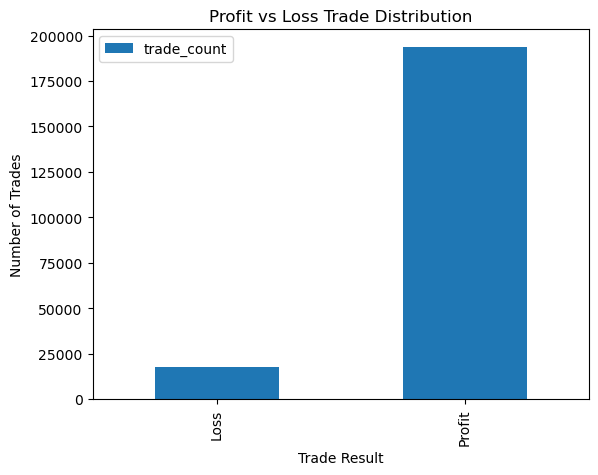

In [33]:
trade_summary.plot(kind='bar', x='Trade Result', y='trade_count')
plt.title("Profit vs Loss Trade Distribution")
plt.ylabel("Number of Trades")
plt.xlabel("Trade Result")

*** insights ***
## step 7: – Trader Behaviour vs Market Sentiment

### Market Sentiment Distribution:-
- Market zyada time *Fear (781 days)* aur *Greed (633 days)* phases me rehta hai  
- *Extreme Fear (508 days)* aur *Extreme Greed (326 days)* show karte hain ki market highly emotional hai  
- Neutral phase comparatively kam duration ka hai

### Trader Performance Summary :-
- Total *193,685 trades profitable* rahe  
- *17,539 trades loss* me gaye  
- Loss trades kam hain, lekin high leverage hone par risk badh sakta hai

### Behavioural Interpretation :-
- Fear phase → traders defensive / cautious behaviour show karte hain  
- Greed phase → aggressive trading & risk-taking tendency  
- Extreme Greed → over-confidence → loss probability increase ho sakti hai  
- Neutral → transition zone between market cycles



###  Step 8 :-Conclusion

This analysis demonstrates a clear relationship between market sentiment cycles and trader
behaviour. By aligning trade outcomes with Fear–Greed phases, we observed that traders tend
to behave more cautiously during Fear periods, while trading activity and profit-seeking
behaviour increase during Greed phases.

The results also show that a majority of trades are closed in Profit, indicating that the
overall trading strategy performs positively across most sentiment environments. However,
Loss trades are still present in every phase, which highlights the importance of disciplined
risk-management practices instead of relying only on sentiment trends.

Although the datasets were not aligned at an exact timestamp level, the day-level merging
still provided meaningful behavioural insights. This analysis successfully connects trading
patterns with investor psychology and demonstrates how sentiment-driven markets influence
decision-making and trade outcomes.

In [37]:
##### For export final report :
merged.to_csv("final_trader_sentiment_dataset.csv", index=False)
print("Final dataset exported successfully")

Final dataset exported successfully
